In [1]:
import os
import sys
sys.path.append('../')
from lib.env.global_var import *
from lib.func.shelve_store import *
sys.path.remove('../')
import statsmodels
import copy

In [57]:
%run -i financial_sector_functions.py

In [3]:
%run -i financial_sector.py

In [4]:
x.head()

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,UMCSENT,BAMLH0A0HYM2,RECPROUSM156N,VIXCLS,XOI Index,YIELD_SLOPE,XAU Curncy
2000-06-30,0.210852,-0.054394,-0.077553,0.103854,1.260199,1.096091,0.459563,-0.829315,-0.016192,-1.097780,1.630211,0.163361,-0.362834,0.017714,-1.345377,-1.880183,-1.199618
2000-07-31,-0.154023,-0.017101,-0.074062,0.121190,1.265161,0.248626,0.462332,-0.951118,-0.008862,-1.097780,1.779992,0.195948,-0.356728,0.170213,-1.414405,-1.797790,-1.225477
2000-08-31,-0.154023,-0.017101,-0.182285,0.137316,1.264795,-0.072037,0.451257,-0.951118,-0.015197,-1.036573,1.701160,0.257500,-0.347135,-0.325409,-1.303837,-1.999318,-1.224213
2000-09-30,-0.154023,-0.017101,-0.157848,0.149813,1.268601,0.408957,0.456795,-0.951118,-0.035350,-1.158986,1.661744,0.380605,-0.334053,0.148609,-1.285910,-1.708717,-1.231794
2000-10-31,-0.518897,-0.024225,-0.168321,0.161706,1.268206,-0.026228,0.454026,-1.009549,-0.002715,-1.158986,1.582912,0.749920,-0.260792,0.537482,-1.307684,-1.693129,-1.250957


In [5]:
y.head()

,sector_beat_spx
2000-06-30,0.0
2000-07-31,1.0
2000-08-31,0.0
2000-09-30,1.0
2000-10-31,1.0


In [6]:
x.index.max(),y.index.max()

(Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-01-31 00:00:00', freq='M'))

# Adding non-econ data

In [7]:
data_description = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',0).T.dropna()
data_description

,0
LUMSTRUU Index,The Bloomberg Barclays US Mortgage Backed Secu...
DXY Curncy,The U.S. Dollar Index(USDX) indicates the gene...
BBDXY Index,The Bloomberg Dollar Spot Index tracks the per...
BXIICSTN Index,For any further information regarding this ind...
LUGCTRUU Index,The Bloomberg Barclays US Government/Credit Bo...


In [8]:
data_description.iloc[4,0]

u'The Bloomberg Barclays US Government/Credit Bond Index is a broad-based flagship benchmark that measures the non-securitized component of the US Aggregate Index. It includes investment grade, US dollar-denominated, fixed-rate Treasuries, government-related and corporate securities.'

In [63]:
fin_sector_df = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',1)
fin_sector_df.index = fin_sector_df.iloc[:,0].values
MBS = fin_sector_df.loc[:,['LUMSTRUU Index']]
USD = fin_sector_df.loc[:,['DXY Curncy']]
# BBUSD = fin_sector_df.loc[:,['BBDXY Index']]
MTWO = fin_sector_df.loc[:,['M2 Index']]
CAPE = fin_sector_df.loc[:,['BXIICSTN Index']]
CREDIT = fin_sector_df.loc[:,['LUGCTRUU Index']]

for var_name in ['MBS','USD','MTWO','CAPE','CREDIT']:
    exec(var_name+"="+var_name+".dropna()")
    exec(var_name+'=pd.DataFrame('+var_name+
          ",index="+var_name+".index, columns ="+var_name+".columns)")

In [69]:
# MBS: ret
# USD: ret
# MTWO: ret
# CAPE: ret
# CREDIT: ret

In [10]:
MBS.index.max(),USD.index.max(),MTWO.index.max(),CAPE.index.max(),CREDIT.index.max()

(Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2014-03-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'))

In [11]:
fin_x = pd.concat([x,MBS,USD,MTWO,CREDIT],1).resample("M").last().dropna()
fin_x.index.max()

Timestamp('2017-01-31 00:00:00', freq='M')

In [70]:
sector_csv_list = ['ASSET_INTEREST.csv','INSURED_CLAIMS.csv','JOB_FINANCE.csv','LOAN_COMM_INDUS.csv'
                   ,'LOANCONSUM.csv','WORKING_POPULATION.csv']
for sector_csv in sector_csv_list:
    temp = read_csv(sector_dir_str+sector_csv)
    temp = pd.DataFrame(temp,index = temp.index,columns = temp.columns)
    temp = quaterly_to_monthly(temp).dropna()
    exec(sector_csv.split(".")[0]+"=temp")
#     print(temp.index.min())

In [75]:
# plt.plot(INSURED_CLAIMS.shift()/INSURED_CLAIMS-1)
# plt.show()

In [79]:
# ASSET_INTEREST(dollars): ret
# INSURED_CLAIMS(Millions): percentage -> divide by number of people
# JOB_FINANCE(percentage): divide by 100
# LOAN_COMM_INDUS(dollars): ret

In [13]:
# JOB_FINANCE : start date 2000-12-31
spx_ind_ret.index.max(),ASSET_INTEREST.index.max(),INSURED_CLAIMS.index.max(),JOB_FINANCE.index.max(),LOAN_COMM_INDUS.index.max()

(Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'))

In [14]:
spx_ind_ret.index.max()

Timestamp('2017-08-31 00:00:00', freq='M')

In [15]:
fin_x = pd.concat([fin_x,spx_ind_ret,ASSET_INTEREST,INSURED_CLAIMS,JOB_FINANCE,LOAN_COMM_INDUS],1).resample("M").last().dropna()

In [16]:
fin_x,y = model_data(fin_x,y)

In [17]:
fin_x.columns

Index([   u'CPALTT01USQ657N',            u'GDP_ret',              u'DGS10',
               u'CSUSHPINSA',             u'PAYEMS',            u'TEDRATE',
                 u'FEDFUNDS',             u'NETEXP',            u'PCE_ret',
                   u'UNRATE',            u'UMCSENT',       u'BAMLH0A0HYM2',
            u'RECPROUSM156N',             u'VIXCLS',          u'XOI Index',
              u'YIELD_SLOPE',         u'XAU Curncy',     u'LUMSTRUU Index',
               u'DXY Curncy',           u'M2 Index',     u'LUGCTRUU Index',
                u'SPX Index', u'TAIEALLGCLCRT100EP',               u'CCSA',
               u'JTU5200JOR',             u'ACILOB'],
      dtype='object')

In [61]:
GDP_ret

,GDP_ret
1947-04-30,0.000581
1947-05-31,0.000581
1947-06-30,0.000581
1947-07-31,0.000702
1947-08-31,0.000702
1947-09-30,0.000702
1947-10-31,0.001863
1947-11-30,0.001863
1947-12-31,0.001863
1948-01-31,0.001073


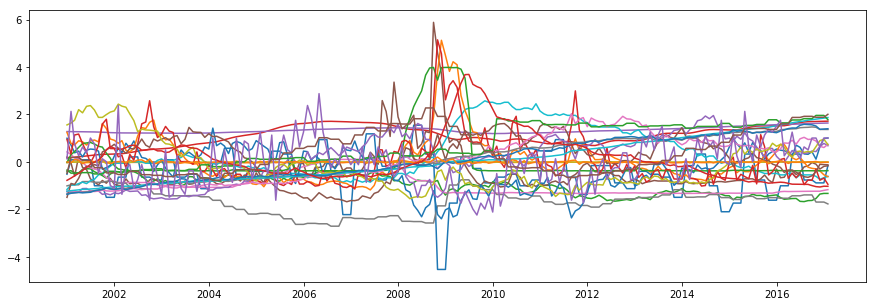

In [18]:
plt.figure(figsize = (15,5))
plt.plot(fin_x)
plt.show()

In [59]:
fin_x.to_csv('~/fin_x.csv')

In [60]:
y.to_csv('~/y.csv')

In [36]:
logistic  = LogisticRegression(penalty='l2', C = 1/(0.00000001))
logistic.fit(fin_x,y)

coef_df = pd.DataFrame(logistic.coef_,columns=fin_x.columns)
predict_df = pd.DataFrame(logistic.predict(fin_x),index=fin_x.index)
predict_prob_df = pd.DataFrame(logistic.predict_proba(fin_x),index = fin_x.index).iloc[:,[1]]

In [37]:
coef_df

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,...,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,SPX Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
0,0.00281,42.741411,-12.381694,0.238271,-21.137079,-0.000004,1.140495,-0.219733,-8.962595,-0.875486,...,1.920071,11.065135,0.19062,8.530925,-26.367427,32.434797,0.740264,-0.132692,-0.111414,0.90958


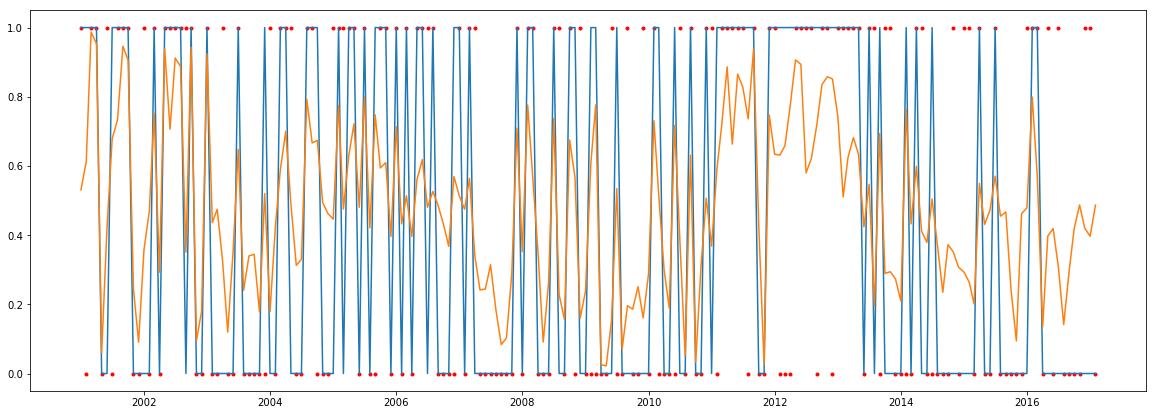

In [38]:
plt.figure(figsize=(20,7))
plt.plot(y,'r.')
plt.plot(predict_df)
plt.plot(predict_prob_df)
plt.show()

In [58]:

evaluate_metric(y,predict_df,'acf')


(0.73711340206185572, 0.73711340206185572)

In [14]:
n = 3
evaluation_metric = 'r2'

In [33]:
metric_list,coef_df = KF_logistic_eval(fin_x,y,n = 3,penalty ='l1',C = 1/(0.10),evaluation_metric = 'r2')

In [34]:
np.round(np.mean(metric_list),2),np.round(metric_list,3)

(-1.1200000000000001, array([-1.232, -1.475, -0.65 ]))

In [35]:
coef_df

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,...,XAU Curncy,LUMSTRUU Index,BBDXY Index,M2 Index,BXIICSTN Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
0,0.347700,0.0,2.553843,-0.606940,-0.224509,0.719746,-0.744077,-0.792234,0.0,0.207214,...,6.488602,0.000000,0.888979,-6.398715,-4.013951,0.0,0.000000,0.000000,0.004816,-0.318250
1,0.376653,0.0,-0.741727,1.373848,-1.394109,-0.202552,0.998140,0.000000,0.0,-0.562165,...,2.613352,4.549865,-0.279945,-9.892125,0.767320,0.0,0.251701,-0.260857,-1.216395,0.000000
2,0.234958,0.0,1.004425,0.000000,-2.177976,0.043825,-0.619927,-0.898288,0.0,-0.386582,...,7.222354,0.000000,-0.505749,-6.822849,-3.708363,0.0,0.000000,0.000000,-0.260018,-1.537191


In [36]:
coef_is_zero = pd.DataFrame(np.prod(coef_df,0)).T
# coef_is_zero[coef_is_zero.values == 0]
zero_coef_ticker_list =[]
for ticker in coef_is_zero.columns:
    if coef_is_zero.loc[0,ticker]==0:
        zero_coef_ticker_list.append(ticker)
        
assert(len(zero_coef_ticker_list)<len(coef_df.columns))
print(len(zero_coef_ticker_list),len(coef_df.columns))
print(zero_coef_ticker_list)

(10, 26)
['GDP_ret', 'CSUSHPINSA', 'NETEXP', 'PCE_ret', u'XOI Index', 'LUMSTRUU Index', 'LUGCTRUU Index', 'TAIEALLGCLCRT100EP', 'CCSA', 'ACILOB']


In [37]:
fin_x_2 = copy.deepcopy(fin_x)
for ticker in zero_coef_ticker_list:
    fin_x_2 = fin_x_2.drop(ticker,1)

In [38]:
lambda_list = [0.001,0.01,0.1,1.0,10.0]
coef_df_all = pd.DataFrame()
for C in map(lambda x: 1/x,lambda_list):
    metric_list,coef_df = KF_logistic_eval(fin_x_2,y,n = 3,penalty ='l2',C = C,evaluation_metric = 'r2')
    coef_df.index = [str(C)+"_0",str(C)+"_1",str(C)+"_2"]
    coef_df_all = pd.concat([coef_df_all,coef_df])
    print(np.mean(metric_list))

-0.999206349206
-1.18095238095
-1.11984126984
-1.11984126984
-1.02817460317


In [44]:
mean_coef_resutls = pd.DataFrame(coef_df_all.apply(np.mean))
print(mean_coef_resutls.T)
n_largest_coef = mean_coef_resutls.nlargest(6,0).T

   CPALTT01USQ657N     DGS10    PAYEMS   TEDRATE  FEDFUNDS    UNRATE  \
0         0.269531  0.407528 -0.252538  0.177908 -1.150069 -0.463926   

    UMCSENT  BAMLH0A0HYM2  RECPROUSM156N    VIXCLS  YIELD_SLOPE  XAU Curncy  \
0  0.681327     -0.135249      -0.124865  0.430929    -0.480047     3.67516   

   BBDXY Index  M2 Index  BXIICSTN Index  JTU5200JOR  
0    -0.088249 -4.984175       -0.712586   -0.328803  


In [47]:
fin_x_2.columns,n_largest_coef

(Index([u'CPALTT01USQ657N',           u'DGS10',          u'PAYEMS',
                u'TEDRATE',        u'FEDFUNDS',          u'UNRATE',
                u'UMCSENT',    u'BAMLH0A0HYM2',   u'RECPROUSM156N',
                 u'VIXCLS',     u'YIELD_SLOPE',      u'XAU Curncy',
            u'BBDXY Index',        u'M2 Index',  u'BXIICSTN Index',
             u'JTU5200JOR'],
       dtype='object'),
    XAU Curncy   UMCSENT    VIXCLS     DGS10  CPALTT01USQ657N   TEDRATE
 0     3.67516  0.681327  0.430929  0.407528         0.269531  0.177908)

In [48]:
fin_x_3 = fin_x_2.loc[:,map(str,n_largest_coef.columns)]

In [49]:
fin_x_3.head()

,XAU Curncy,UMCSENT,VIXCLS,DGS10,CPALTT01USQ657N,TEDRATE
2000-12-31,-1.236006,0.999553,0.946688,-0.395239,-0.518897,0.202817
2001-01-31,-1.249483,0.707874,0.332879,-0.370802,0.089227,-0.049132
2001-02-28,-1.246745,0.384662,1.137311,-0.465060,0.089227,-0.598839
2001-03-31,-1.266118,0.455611,1.174165,-0.461569,0.089227,0.225721
2001-04-30,-1.253273,0.211231,0.772584,-0.314945,0.089227,-0.232368


In [50]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=4)
pca_fin_x = pd.DataFrame(pca.fit_transform(fin_x_3),index=fin_x.index)
np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_

(0.97607850133156471,
 array([ 0.4969759 ,  0.21005769,  0.17827818,  0.09076673]))

In [52]:
pca_scaled_fin = pd.DataFrame(preprocessing.scale(pca_fin_x),index= pca_fin_x.index)

In [65]:
JOB_FINANCE,y=model_data(JOB_FINANCE,y)
JOB_FINANCE.head()

,JTU5200JOR
2000-12-31,0.133431
2001-01-31,2.129957
2001-02-28,0.757346
2001-03-31,0.258214
2001-04-30,0.632563


In [67]:
metric_list,coef_df = KF_logistic_eval(JOB_FINANCE
    ,y,n = 3,penalty ='l2',C = 1/(10.0),evaluation_metric = 'r2')
coef_df

,JTU5200JOR
0,0.135835
1,-0.093077
2,-0.028389


In [68]:
metric_list

[-1.2321428571428568, -1.1083333333333338, -0.92500000000000049]